In [100]:
import numpy as np
import math 
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [101]:
malha = np.zeros((5,5))
k = 230
densidade = 2700
c_esp = 897
alfa = k/(c_esp*densidade)
deltat = 1e-3
deltax = 0.1
alfa_delta = alfa*deltat/(deltax**2)

In [102]:
malha[0] = [150, 150, 150, 150, 0]
malha[:,-1] = [0, 50, 50, 50, 0]
print(malha)

[[150. 150. 150. 150.   0.]
 [  0.   0.   0.   0.  50.]
 [  0.   0.   0.   0.  50.]
 [  0.   0.   0.   0.  50.]
 [  0.   0.   0.   0.   0.]]


In [103]:
nova_malha = np.zeros((5,5))
nova_malha[0] = [150, 150, 150, 150, 0]
nova_malha[:,-1] = [0, 50, 50, 50, 0]
nova_malha

array([[150., 150., 150., 150.,   0.],
       [  0.,   0.,   0.,   0.,  50.],
       [  0.,   0.,   0.,   0.,  50.],
       [  0.,   0.,   0.,   0.,  50.],
       [  0.,   0.,   0.,   0.,   0.]])

In [104]:
l= 1
c = 0
ts = np.arange(0,10, 1e-3)

for t in ts:
    l = 1
    while(l<4):
        while(c<4):
            if c == 0:
                nova_malha[l][c] = round(malha[l][c] + alfa_delta*(2*malha[l+1][c]+malha[l-1][c]+malha[l][c+1]-4*malha[l][c]),8)
            else:
                nova_malha[l][c] = round(malha[l][c] + alfa_delta*(malha[l+1][c]+malha[l-1][c]+malha[l][c+1]+malha[l][c-1]-4*malha[l][c]),8)
            c+=1
        c = 0
        l += 1
    malha = nova_malha

print(malha)

[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  0.00000000e+00]
 [1.24471337e+01 1.29815651e+01 1.31629318e+01 1.65733079e+01
  5.00000000e+01]
 [5.63675640e-01 6.02481680e-01 7.94629280e-01 4.88234271e+00
  5.00000000e+01]
 [1.75347500e-02 2.43532500e-02 2.06097380e-01 4.16062477e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]]


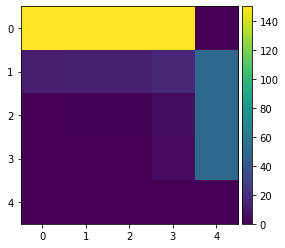

In [105]:
ax = plt.subplot(111)
im = ax.imshow(malha)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im,cax = cax)
